In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy.stats as stats

import scipy
import pywt
import mne
import math

import sys
from tqdm import tqdm


sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *
from wavelet_utils import *
from stats_utils import *
import glob
import os


import seaborn as sns
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Wavelet for multiple subjects listen and motor

In [2]:
task = 'listen'
ch_to_visualize = ['Cz']

wavelet_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/wavelets_mat_{task}__n05to05_30Hz_all_ave_freq'
subjects_to_process = find_existing_subjects(wavelet_dir)

good_listen_subjects, good_motor_subjects, musicians, nonmusicians = load_subject_lists()

print('processing subjects', subjects_to_process)

wavelet_trans_info = loadmat(os.path.join(wavelet_dir,f'wavelet_record.mat'))
times = wavelet_trans_info['times'].squeeze()
freqs = wavelet_trans_info['freqs'].squeeze()

processing subjects ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']


In [3]:
"""period = 'pre'
task = 'listen'
channels = 'Cz'"""

power_df_all = power_over_subs(subjects_to_process, wavelet_dir, freqs_to_sum='all', already_ave=True, ch_to_process = ch_to_visualize)

power_all_pre = power_df_all.query("period == 'pre'")
power_all_post = power_df_all.query("period == 'post'")

wavelet sub shape: (40, 129)
skipping sub record


In [26]:
power_df_610 = power_over_subs(subjects_to_process, wavelet_dir, already_ave=True, freqs_to_sum=[12,30], ch_to_process = ['Cz'])


wavelet sub shape: (40, 129)
skipping sub record


In [27]:
scores_df = pd.read_csv('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/utils/training_scores_rank.csv')


In [28]:
scores_df['subject'] = scores_df['subject'].astype(int).apply(lambda x: f'{x:02d}')


In [29]:
power_ranked = power_df_610.merge(scores_df, on = ['subject'])

In [30]:
power_ranked_pre = power_ranked.query('period == "pre"')
power_ranked_post = power_ranked.query('period == "post"')

In [31]:
power_ranked_pre

,subject,musician_x,period,power,Unnamed: 0,score,musician_y,rank
1,01,0,pre,4.873706e-09,16,2.602410,0,17
3,02,1,pre,6.772040e-09,3,3.698795,1,4
5,03,0,pre,9.746506e-09,5,3.469880,0,6
7,04,0,pre,7.770045e-09,19,2.192771,0,20
9,05,0,pre,1.179194e-08,17,2.313253,0,18
11,06,1,pre,1.169928e-08,12,3.060241,1,13
13,07,1,pre,6.627163e-09,11,3.180723,1,12
15,08,0,pre,9.779460e-09,13,3.036145,0,14
17,09,0,pre,2.961503e-09,9,3.325301,0,10
19,10,0,pre,4.765000e-09,8,3.373494,0,9


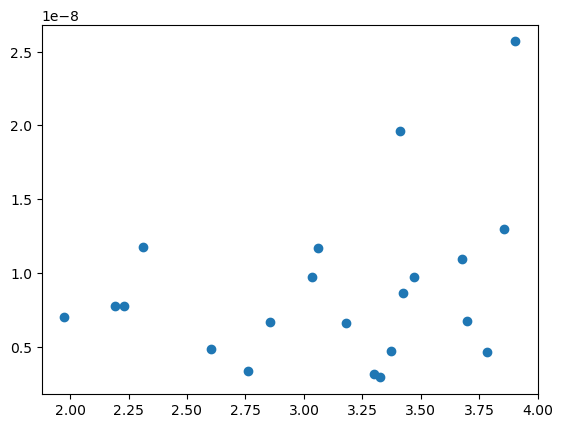

In [34]:
plt.scatter(power_ranked_pre['score'], power_ranked_pre['power'])

In [35]:
stats.spearmanr(power_ranked_post['score'], power_ranked_post['power'])

SignificanceResult(statistic=0.18571428571428572, pvalue=0.4202513335237501)